Yulu - Hypothesis Testing

About Yulu & Problem Statement:

Yulu is India’s leading micro-mobility service provider, which offers unique vehicles for the daily commute. Starting off as a mission to eliminate traffic congestion in India, Yulu provides the safest commute solution through a user-friendly mobile app to enable shared, solo and sustainable commuting.

Yulu zones are located at all the appropriate locations (including metro stations, bus stands, office spaces, residential areas, corporate offices, etc) to make those first and last miles smooth, affordable, and convenient!

Yulu has recently suffered considerable dips in its revenues. They have contracted a consulting company to understand the factors on which the demand for these shared electric cycles depends. Specifically, they want to understand the factors affecting the demand for these shared electric cycles in the Indian market.

Definition of problem:

The company wants to know:


    Which variables are significant in predicting the demand for shared electric cycles in the Indian market?
    How well those variables describe the electric cycle demands?

Column Profiling:

    datetime: datetime
    season: season (1: spring, 2: summer, 3: fall, 4: winter)
    holiday: whether day is a holiday or not (extracted from http://dchr.dc.gov/page/holiday-schedule)
    workingday: if day is neither weekend nor holiday is 1, otherwise is 0.
    weather:
        1: Clear, Few clouds, partly cloudy, partly cloudy
        2: Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist
        3: Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds
        4: Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog
    temp: temperature in Celsius
    atemp: feeling temperature in Celsius
    humidity: humidity
    windspeed: wind speed
    casual: count of casual users
    registered: count of registered users
    count: count of total rental bikes including both casual and registered

In [31]:
# Import the libraries:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from scipy.stats import norm, t
from scipy.stats import ttest_1samp, ttest_ind
from scipy.stats import chi2_contingency # Categorical Vs Categorical
from scipy.stats import f_oneway # Numeric Vs categorical

Observations on shape of data, data types of all the attributes, conversion of categorical attributes to 'category' (If required) , missing value detection, statistical summary.

In [3]:
#Read the bike_sharing data
df = pd.read_csv('bike_sharing.csv')
df.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1


In [4]:
#Checking the shape of the data
df.shape

(10886, 12)

In [5]:
#Data type of all the attributes
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   datetime    10886 non-null  object 
 1   season      10886 non-null  int64  
 2   holiday     10886 non-null  int64  
 3   workingday  10886 non-null  int64  
 4   weather     10886 non-null  int64  
 5   temp        10886 non-null  float64
 6   atemp       10886 non-null  float64
 7   humidity    10886 non-null  int64  
 8   windspeed   10886 non-null  float64
 9   casual      10886 non-null  int64  
 10  registered  10886 non-null  int64  
 11  count       10886 non-null  int64  
dtypes: float64(3), int64(8), object(1)
memory usage: 1020.7+ KB


Initial Observation:
    
    1. There are no missing values in the data.
    2. Data types of below attributes needs to be changed:
       datetime - to datetime 
       season -  a categorical attribute that needs to be changed to object type
       holiday - a categorical attribute that needs to be changed to object type
       workingday - a categorical attribute that needs to be changed to object type
       weather - a categorical attribute that needs to be changed to object type
    3. Data seems to be recorded per hour for a day and each records shows how many bike were rented during that hour of the day.

Preprocessing of Data:

In [6]:
#changing datetime type
df['datetime'] = pd.to_datetime(df['datetime'])

#changing category columns type
category_cols= ['season', 'holiday', 'workingday', 'weather']
for col in category_cols:
    df[col] = df[col].astype('object')

Data type after preprocessing:

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   datetime    10886 non-null  datetime64[ns]
 1   season      10886 non-null  object        
 2   holiday     10886 non-null  object        
 3   workingday  10886 non-null  object        
 4   weather     10886 non-null  object        
 5   temp        10886 non-null  float64       
 6   atemp       10886 non-null  float64       
 7   humidity    10886 non-null  int64         
 8   windspeed   10886 non-null  float64       
 9   casual      10886 non-null  int64         
 10  registered  10886 non-null  int64         
 11  count       10886 non-null  int64         
dtypes: datetime64[ns](1), float64(3), int64(4), object(4)
memory usage: 1020.7+ KB


We have datetime and category columns changed to the required data type.

Statistical summary of categorical and numerical attributes:

In [8]:
df.describe(include='all', datetime_is_numeric=True)

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
count,10886,10886.0,10886.0,10886.0,10886.0,10886.00000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000
unique,NaN,4.0,2.0,2.0,4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,4.0,0.0,1.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,2734.0,10575.0,7412.0,7192.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,2011-12-27 05:56:22.399411968,NaN,NaN,NaN,NaN,20.23086,23.655084,61.886460,12.799395,36.021955,155.552177,191.574132
min,2011-01-01 00:00:00,NaN,NaN,NaN,NaN,0.82000,0.760000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,2011-07-02 07:15:00,NaN,NaN,NaN,NaN,13.94000,16.665000,47.000000,7.001500,4.000000,36.000000,42.000000
50%,2012-01-01 20:30:00,NaN,NaN,NaN,NaN,20.50000,24.240000,62.000000,12.998000,17.000000,118.000000,145.000000
75%,2012-07-01 12:45:00,NaN,NaN,NaN,NaN,26.24000,31.060000,77.000000,16.997900,49.000000,222.000000,284.000000
max,2012-12-19 23:00:00,NaN,NaN,NaN,NaN,41.00000,45.455000,100.000000,56.996900,367.000000,886.000000,977.000000


Observations from the data:
    
    1.Casual and registered both have outliers as the mean and the median are significantly different.Both are right-tailed.
    
    2.The standard deviation of casual and registered are quite high suggesting high variance for these attributes. 
    
    3. We can also observe the statistical summary of numerical(temp,atemp,humidity, windspeed) attributes. Mean and median for these variables are fairly close. There doesn't seem to many outliers for these attributes.Also, the variance is not too much.

In [9]:
#Checking missing values:
df.isnull().sum()

datetime      0
season        0
holiday       0
workingday    0
weather       0
temp          0
atemp         0
humidity      0
windspeed     0
casual        0
registered    0
count         0
dtype: int64

There are no missing values in the dataset.

In [10]:
df[category_cols].melt().groupby(['variable', 'value'])[['value']].count()/len(df[category_cols])*100

value
variable   value           
holiday    0      97.143120
           1       2.856880
season     1      24.673893
           2      25.105640
           3      25.105640
           4      25.114826
weather    1      66.066507
           2      26.033437
           3       7.890869
           4       0.009186
workingday 0      31.912548
           1      68.087452

Distribution of data among the categories:
    
    1. Holidays constitutes 3% of the data.
    2. 68% of the total period constitutes working day and 32% of the total duration constitutes holiday and weekends.
    3. We have customers registering mostly in clear, few clouds, or partly cloudy weather constituting 66% of the data. Customers registering during heavy rain, mist, snow are very very insignificant.
    4. Season is evenly distributed in the data.

Percentage of bike rented : Casual and Registered
    

In [25]:
(df['casual'].sum()/df['count'].sum()) *100

18.8031413451893

In [26]:
(df['registered'].sum()/df['count'].sum()) *100

81.1968586548107

Observations:
    
    1. The percentage of registered(~81%) bike rent is much higher than casual(~19%) rent. 

Univariate Analysis:

The distribution of the data for the quantitative attributes can be explored using histplot.

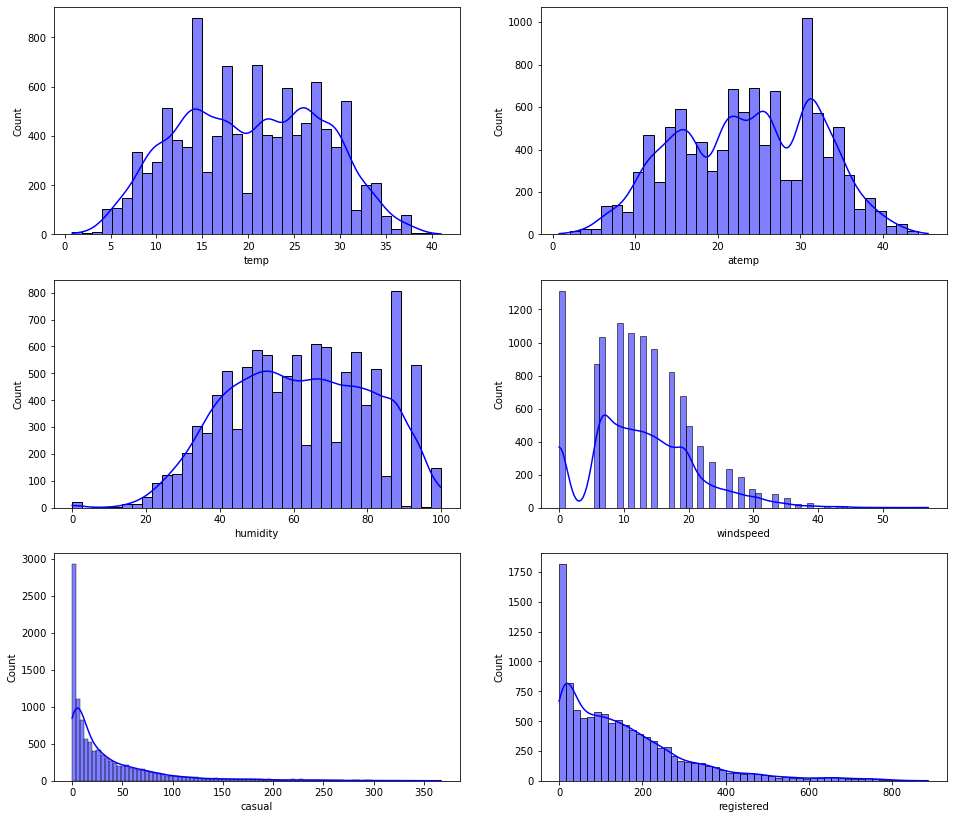

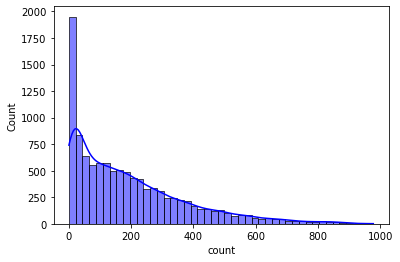

In [13]:

fig, axis = plt.subplots(nrows=3, ncols=2, figsize=(16, 10))
fig.subplots_adjust(top=1.2)

sns.histplot(data=df, x="temp", kde=True, ax=axis[0,0],color='blue')
sns.histplot(data=df, x="atemp", kde=True, ax=axis[0,1],color='blue')
sns.histplot(data=df, x="humidity", kde=True, ax=axis[1,0],color='blue')
sns.histplot(data=df, x="windspeed", kde=True, ax=axis[1,1],color='blue')
sns.histplot(data=df, x="casual", kde=True, ax=axis[2,0],color='blue')
sns.histplot(data=df, x="registered", kde=True, ax=axis[2,1],color='blue')

plt.show()

sns.histplot(data=df, x="count", kde=True,color='blue')

plt.show()

From the above histplots we can observe:
    
    1. casual, registered, and count are right-tailed and seems to follow log normal distrinution.
    2. temp, atemp and humidity seems to follow the gaussian distribution.
    3. windspeed seems to follow the binomial distribution.

Outliers detection using boxplot:

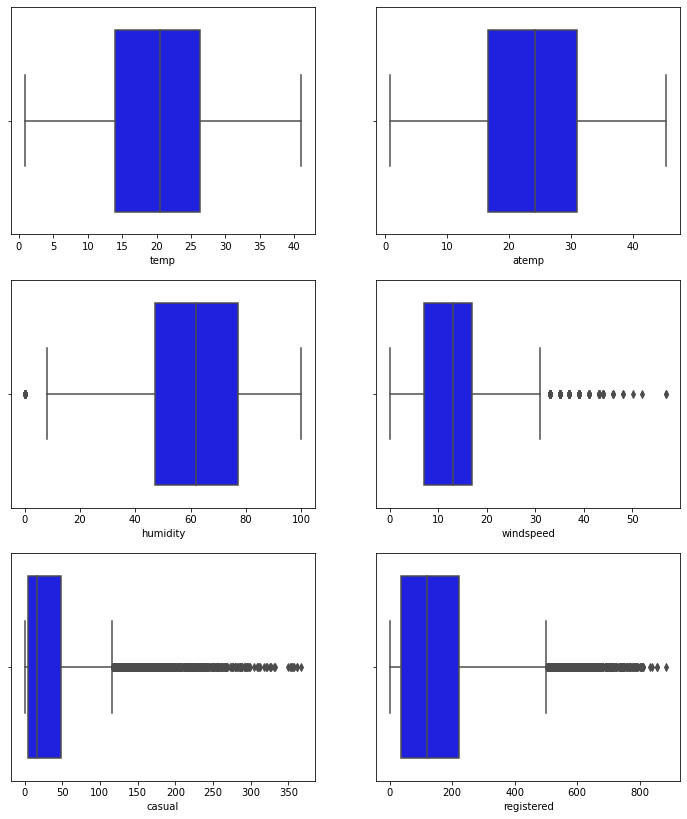

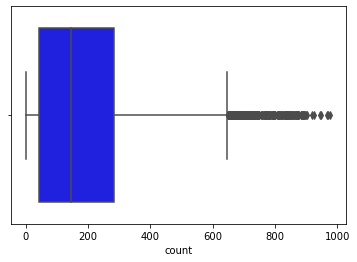

In [14]:
fig, axis = plt.subplots(nrows=3, ncols=2, figsize=(12, 10))
fig.subplots_adjust(top=1.2)

sns.boxplot(data=df, x="temp", orient='h', ax=axis[0,0],color='blue')
sns.boxplot(data=df, x="atemp", orient='h', ax=axis[0,1],color='blue')
sns.boxplot(data=df, x="humidity", orient='h', ax=axis[1,0],color='blue')
sns.boxplot(data=df, x="windspeed", orient='h', ax=axis[1,1],color='blue')
sns.boxplot(data=df, x="casual", orient='h', ax=axis[2,0],color='blue')
sns.boxplot(data=df, x="registered", orient='h', ax=axis[2,1],color='blue')
plt.show()

sns.boxplot(data=df, x="count", orient='h',color='blue')
plt.show()

Obervation:

From the boxplots below points are evident:

1. casual, registered, and count have quite a lot outliers.
2. Windspeed also have few outliers and humidity have one outlier.

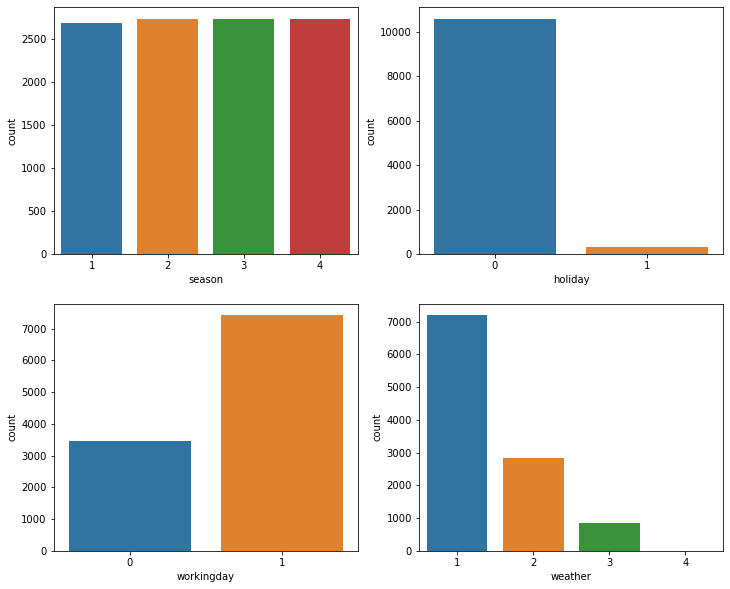

In [15]:
# countplot of each categorical column
fig, axis = plt.subplots(nrows=2, ncols=2, figsize=(12, 10))

index = 0
for row in range(2):
    for col in range(2):
        sns.countplot(data=df, x=category_cols[index], ax=axis[row, col])
        index += 1
        
plt.show()

The countplots of categorical data validates our initial observation on the distribution of the catagorical data.

    1. Working days are more as expected than holidays.
    2. Non working day count increases as expected after inclusion of weekends.
    3. Weather is mostly clear, few clouds, or partly cloudy. Category 4 i.e. Heavy rain is almost nil which suggest there are no bike rented during heavy rain.
    4. Season is evenly distributed in the data.

Bivariate Analysis:

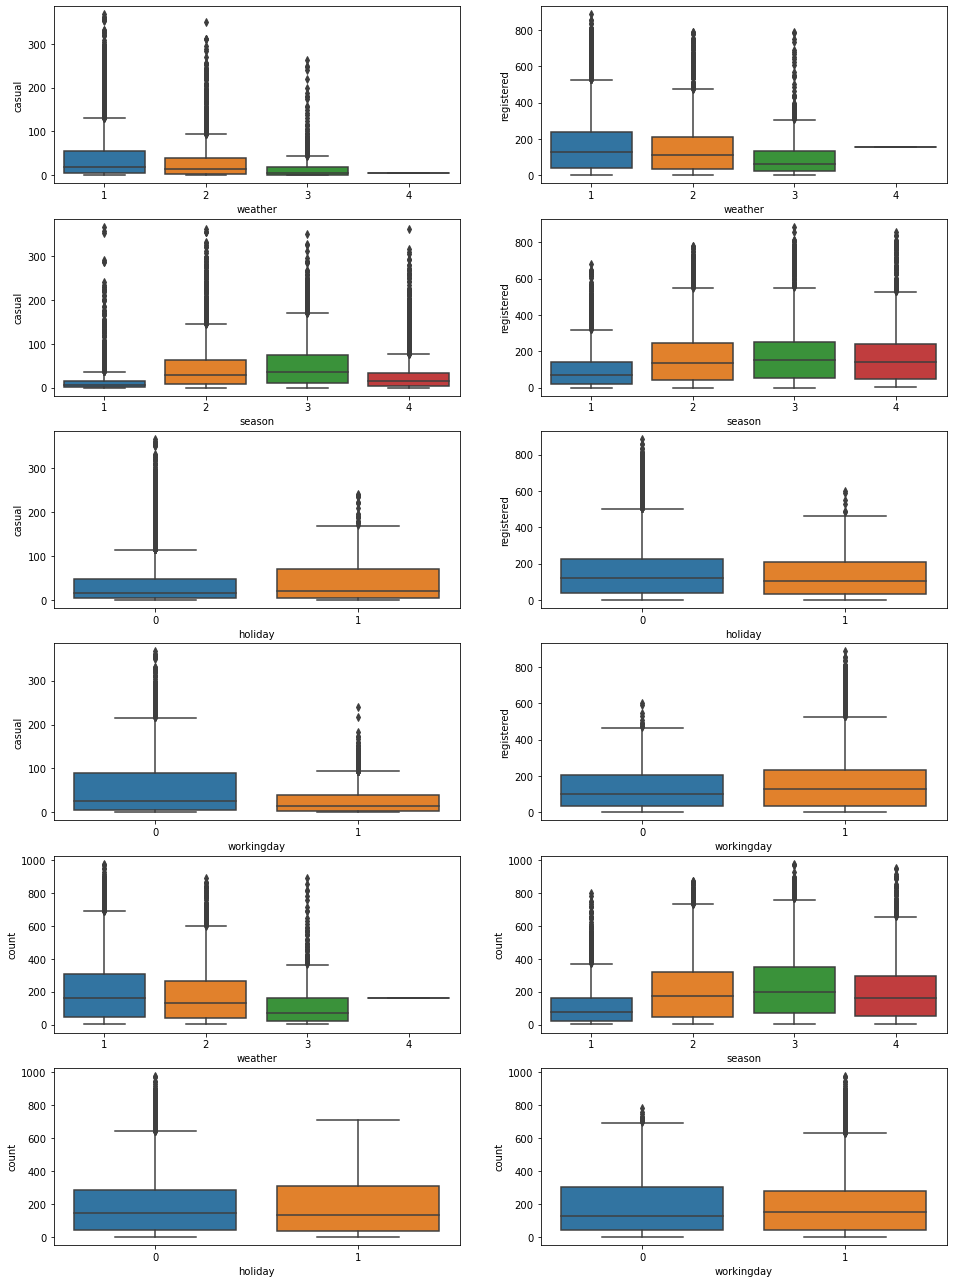

In [22]:
# Boxplot showing relation of categorical attributes with casual, registered, and total count of people renting bike.

fig, axis = plt.subplots(nrows=6, ncols=2, figsize=(16, 16))
fig.subplots_adjust(top=1.2)

sns.boxplot(data=df, x="weather", y='casual', ax=axis[0,0])
sns.boxplot(data=df, x="weather", y='registered', ax=axis[0,1])
sns.boxplot(data=df, x="season", y='casual', ax=axis[1,0])
sns.boxplot(data=df, x="season", y='registered', ax=axis[1,1])
sns.boxplot(data=df, x="holiday", y='casual', ax=axis[2,0])
sns.boxplot(data=df, x="holiday", y='registered', ax=axis[2,1])
sns.boxplot(data=df, x="workingday", y='casual', ax=axis[3,0])
sns.boxplot(data=df, x="workingday", y='registered', ax=axis[3,1])
sns.boxplot(data=df, x="weather", y='count', ax=axis[4,0])
sns.boxplot(data=df, x="season", y='count', ax=axis[4,1])
sns.boxplot(data=df, x="holiday", y='count', ax=axis[5,0])
sns.boxplot(data=df, x="workingday", y='count', ax=axis[5,1])
plt.show()

Observations:
    
    1. As expected weather does play a role in people renting the bike. People prefer clearer weather to go out for biking. Still, we have people registering on cloudy and little rainy weather with quite some outliers which might be because of holidays and non-working days.
    2. Season 2 and 3 i.e. summer and fall have contributed in more people renting the bike.
    3. On holidays people renting bike is high as we can see there are quite a lot outliers on holidays.
    4. On non-working day the count of rented bike is slighly higher. Especially count of casual bikers are significantly higher on non-working days. However, the total count of rented bike doesn't seem to have much effect basis working day.
    5. People going for registered bike rent are higher than casual. Also, the pattern of casual and registered users vary for different categorical attributes.

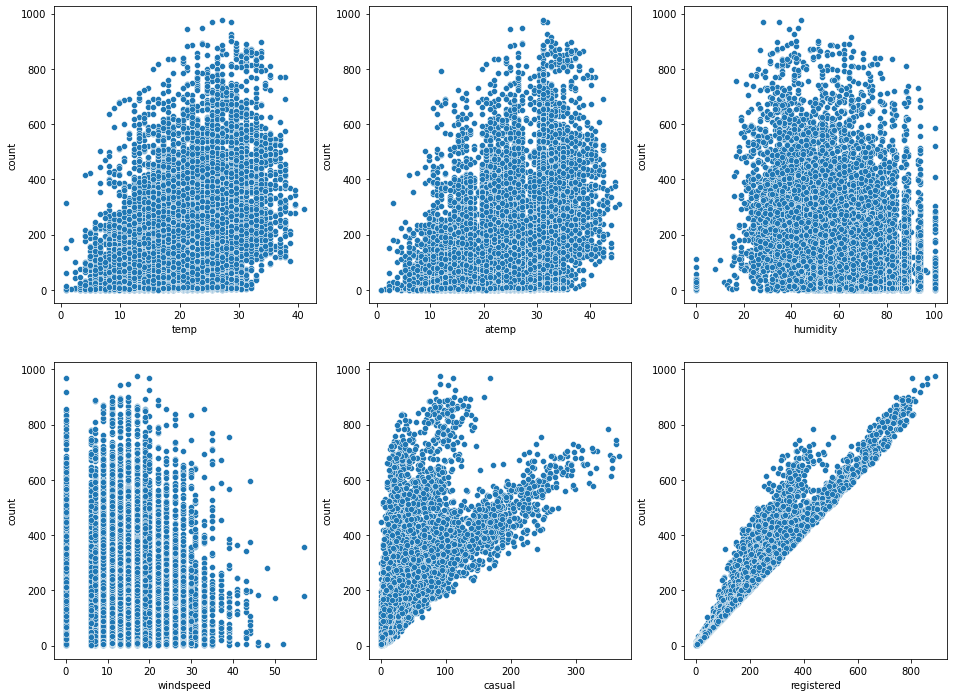

In [17]:
# plotting numerical variables againt count using scatterplot

numeric_cols = ['temp', 'atemp', 'humidity', 'windspeed', 'casual', 'registered','count']
fig, axis = plt.subplots(nrows=2, ncols=3, figsize=(16, 12))

index = 0
for row in range(2):
    for col in range(3):
        sns.scatterplot(data=df, x=numeric_cols[index], y='count', ax=axis[row, col])
        index += 1
        
plt.show()

Observations:

    1. Casual, registered seems like following Log Normal Distrinution.
    2. temp, atemp and humidity looks like they follows the Normal Distribution.
    3. windspeed follows the binomial distribution.
    4. Humidity < 20 causes less number of bikes rented. Temperature < 10 also causes very low count of bike renting. And, high windspeed also plays a role in affecting the count of people renting bike.

Correlation among differnt numerical factors:

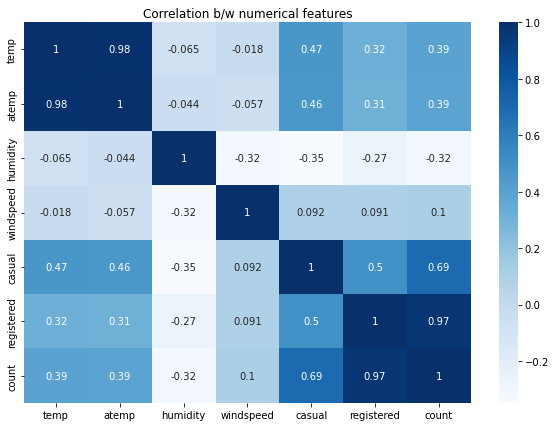

In [23]:
plt.figure(figsize=(10,7))
sns.heatmap(df[['temp', 'atemp', 'humidity', 'windspeed', 'casual', 'registered','count']].corr(), annot = True, cmap = 'Blues')

plt.title("Correlation b/w numerical features")
plt.show()

Observations:
    
    1. The correlation temperature and count is 0.39 which suggest there is some correlation of temperature with total count of people renting bike.
    2. The correlation of casual users(0.46) to bike renting count is higher than registered users(0.31) to bike renting count.
    3. Humidity has negative correlation with number of cycles rented.

In [24]:
# understanding the correlation of numerical variables with count.
df.corr()['count']

temp          0.394454
atemp         0.389784
humidity     -0.317371
windspeed     0.101369
casual        0.690414
registered    0.970948
count         1.000000
Name: count, dtype: float64

Observation:
    
    1. Only humidity is negatively correlated with count of bike rented. temp is slightly more correlated than other numerical attributes.
    2. casual and registered are as expected highly correlated as count is total of casual and registered.

Hypothesis Testing - 1

    Weather Vs Season

        Null Hypothesis (H0): Weather is independent of season

        Alternate Hypothesis (H1): Weather is not independent of the season

        Significance level (alpha): 0.05

        We can use chi-square test to check our hypothesis.

In [61]:
observed_values = pd.crosstab(index=df["season"], columns=df["weather"])
print("Observed values:")
observed_values

Observed values:


weather,1,2,3,4
season,,,,
1,1759,715,211,1
2,1801,708,224,0
3,1930,604,199,0
4,1702,807,225,0


In [60]:
out = stats.chi2_contingency(observed_values)
expected_values = out[3]
print("Expected values:")
expected_values

Expected values:


array([[1.77454639e+03, 6.99258130e+02, 2.11948742e+02, 2.46738931e-01],
       [1.80559765e+03, 7.11493845e+02, 2.15657450e+02, 2.51056403e-01],
       [1.80559765e+03, 7.11493845e+02, 2.15657450e+02, 2.51056403e-01],
       [1.80625831e+03, 7.11754180e+02, 2.15736359e+02, 2.51148264e-01]])

Observation:
    
    1. From the above result we can see expected value differs from observed values which suggests null hypothesis can be rejected.

In [46]:
dof = out[2]
print("degrees of freedom: ", dof)

alpha = 0.05 #let's assume significance level to be 0.05


chi_sqr = sum([(o-e)**2/e for o, e in zip(observed_values.values, expected_values)])
chi_sqr_statistic = chi_sqr[0] + chi_sqr[1]
print("chi-square test statistic: ", chi_sqr_statistic)

critical_val = stats.chi2.ppf(0.95, df=dof) #0.95=1-alpha
print(f"critical value: {critical_val}")

p_val = 1-stats.chi2.cdf(x=chi_sqr_statistic, df=dof)
print(f"p-value: {p_val}")

if p_val <= alpha:
    print("\nSince p-value is less than the alpha 0.05, We reject the Null Hypothesis. It means\
 weather is dependent on the season.")

else:
    print("Since p-value is greater than the alpha 0.05, We do not reject the Null Hypothesis")


degrees of freedom:  9
chi-square test statistic:  44.09441248632364
critical value: 16.918977604620448
p-value: 1.3560001579371317e-06

Since p-value is less than the alpha 0.05, We reject the Null Hypothesis. It means weather is dependent on the season.


In [50]:
#Using library

stats.chi2_contingency(observed_values)

(49.158655596893624,
 1.549925073686492e-07,
 9,
 array([[1.77454639e+03, 6.99258130e+02, 2.11948742e+02, 2.46738931e-01],
        [1.80559765e+03, 7.11493845e+02, 2.15657450e+02, 2.51056403e-01],
        [1.80559765e+03, 7.11493845e+02, 2.15657450e+02, 2.51056403e-01],
        [1.80625831e+03, 7.11754180e+02, 2.15736359e+02, 2.51148264e-01]]))

Observation:
    
    Here also we can see the p-value is very small. Thus, we can reject the null hypothesis. We can say the weather is dependent on season.

Hypothesis Testing - 2

    Null Hypothesis: Working day has no effect on the number of bikes rented.

    Alternate Hypothesis: Working day has effect on the number of bikes rented.

    Significance level (alpha): 0.05

    We can use 2-Sample T-Test to test the hypothesis defined above.

In [53]:
nonworkingday = df[df['workingday']==0]['count'].values
workingday = df[df['workingday']==1]['count'].values

Before conducting the two-sample T-Test we need to find if the given data groups have the same variance. If the ratio of the larger data groups to the small data group is less than 4:1 then we can consider that the given data groups have equal variance.

In [55]:
np.var(workingday), np.var(nonworkingday)

(34040.69710674686, 30171.346098942427)

Observation:
    
    Since the ratio of variance of working day and non-working day bike counts is less than 4:1 we can consider the variance are equal.

In [56]:
stats.ttest_ind(a=nonworkingday, b=workingday, equal_var=True)

Ttest_indResult(statistic=-1.2096277376026694, pvalue=0.22644804226361348)

Observation:
    
    We can see the p value is higher than alpha, hence the test statistics is not statistically significant to reject the null hypothesis. Hence, we cannot say that renting bike is affected by working day and non-working day.

Hypothesis Testing - 3

    Null Hypothesis: Number of cycles rented is similar in different weather and season.

    Alternate Hypothesis: Number of cycles rented is not similar in different weather and season.

    Significance level (alpha): 0.05

    Here, we can use the ANOVA test to test the hypothesis defined above:

In [59]:
# Segregating the data groups for the ANOVA

grp1 = df[df['weather']==1]['count'].values
grp2 = df[df['weather']==2]['count'].values
grp3 = df[df['weather']==3]['count'].values
grp4 = df[df['weather']==4]['count'].values

grp5 = df[df['season']==1]['count'].values
grp6 = df[df['season']==2]['count'].values
grp7 = df[df['season']==3]['count'].values
grp8 = df[df['season']==4]['count'].values

# one-way anova test to determine the relation
stats.f_oneway(grp1, grp2, grp3, grp4, grp5, grp6, grp7, grp8)

F_onewayResult(statistic=127.96661249562491, pvalue=2.8074771742434642e-185)

Observation:
    
        Since p-value is very less than 0.05, the test statistic is statistically significant to reject the null hypothesis.This implies that Number of cycles rented is not similar in different weather and season conditions.

Insights:
    
    1. In summer and fall seasons more bikes are rented as compared to other seasons.
    2. Holiday does affect the count of bikes rented as we can see the bike counts are higher on holidays.
    3. There is not much statistical differnce basis working day/non-working day for the total count of bike rented. But, still we have seen the bike count of casual users is higher on non-working days.
    4. Whenever there is rain, thunderstorm, snow or fog, there were very less bikes were rented.
    5. Whenever the humidity is less than 20, number of bikes rented is very very low.
    6. Temperature also seems to affect the people renting bike. Whenever the temperature is less than 10, number of bikes rented is less.
    7. Whenever the windspeed is greater than 35, number of bikes rented is less.
    
Recommendations:
    
    1. In summer and fall seasons the company should have more bikes in stock to be rented. Because the demand in these seasons is higher as compared to other seasons.
    2. With a significance level of 0.05, workingday has no effect on the number of bikes being rented. So, company can equally focus on both working and non-working day to increase the bike stock.
    3. In very low humid days, company should have less bikes in the stock to be rented.
    4. Company can have some way to stock more bikes when temprature is in between 20-30. In very cold days there is not much demand.
    5. Whenever the windspeed is greater than 35 or in thunderstorms, company should have less bikes in stock to be rented.
